In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Dropout, Flatten, Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import TFNNModels as NNM

### Data Processing

In [2]:
df_good_inp = pd.read_csv('DataFiles/goodinp_0.6.csv')  # import data
df_good_target = pd.read_csv('DataFiles/goodtar_0.6.csv')  # import data

In [3]:
df_good_inp.head()

,VIX,VIY,VGX,VGY,OIX,OIY
0,0.948718,0.953576,0.000000,0.471215,1.000000,0.000000
1,0.473333,0.000000,0.785714,0.752358,0.000000,0.838095
2,0.000000,0.497027,1.000000,0.707911,0.929785,0.107943
3,0.767296,0.237470,1.000000,1.000000,0.000000,0.368359
4,0.000000,0.904818,0.609756,0.540712,0.204265,0.000000


In [3]:
df_good_target.head()

,VM1X,VM1Y,VM2X,VM2Y
0,0.712500,0.913178,0.102703,1.000000
1,0.892045,0.331683,0.886792,0.219355
2,0.293706,0.517241,0.983240,0.855856
3,0.958763,0.204017,1.000000,0.997552
4,1.000000,0.644556,0.805714,0.344101


In [5]:
df_good_inp.shape

(5001, 6)

In [4]:
# Train and Test input
splitX = round(.70*len(df_good_inp))
max = len(df_good_inp)

trainX = df_good_inp[0:splitX]
testX = df_good_inp[splitX+1:max]


In [5]:
# Train and Test target
splitY = round(.70*len(df_good_target))
max = len(df_good_target)

trainY = df_good_target[0:splitY]
testY = df_good_target[splitY+1:max]

In [6]:
trainX = np.asarray(trainX)
trainX.shape

(3501, 6)

In [7]:
testX = np.asarray(testX)
testX.shape

(1499, 6)

In [8]:
sample_size = trainX.shape[0] # number of samples in train set
time_steps  = trainX.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number
train_data_reshaped = trainX.reshape(sample_size,time_steps,input_dimension)

In [9]:
test_data_reshaped = testX.reshape(testX.shape[0],testX.shape[1],1)

In [10]:
# train target
train_target1 = np.asarray(trainY['VM1X'])
test_target1 = np.asarray(testY['VM1X'])

train_target2 = np.asarray(trainY['VM1Y'])
test_target2 = np.asarray(testY['VM1Y'])

train_target3 = np.asarray(trainY['VM2X'])
test_target3 = np.asarray(testY['VM2X'])

train_target4 = np.asarray(trainY['VM2Y'])
test_target4 = np.asarray(testY['VM2Y'])

In [18]:
#trainY = to_categorical(trainY)
#testY = to_categorical(testY)

In [11]:
kernel_size = 2
n_timesteps = train_data_reshaped.shape[1] #13
n_features  = train_data_reshaped.shape[2] #1 

In [12]:
train_data_reshaped.shape

(3501, 6, 1)

In [13]:
train_target1.shape

(3501,)

### CNN Model

In [14]:
NNM = NNM.TFNNModels()
model_conv1D_tar1 = NNM.build_conv1D_model(n_timesteps,n_features,kernel_size)
model_conv1D_tar2 = NNM.build_conv1D_model(n_timesteps,n_features,kernel_size)
model_conv1D_tar3 = NNM.build_conv1D_model(n_timesteps,n_features,kernel_size)
model_conv1D_tar4 = NNM.build_conv1D_model(n_timesteps,n_features,kernel_size)

Created NN Model Instance


In [58]:
model_conv1D_tar1.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 5, 64)             192       
                                                                 
 dropout_1 (Dropout)         (None, 5, 64)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 3, 32)             6176      
                                                                 
 Conv1D_3 (Conv1D)           (None, 2, 16)             1040      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 1, 16)            0         
                                                                 
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)               

In [16]:
# Store training stats
history1 = model_conv1D_tar1.fit(train_data_reshaped, train_target1, epochs=50,
                    validation_split=0.2, verbose=0)

In [17]:
history2 = model_conv1D_tar2.fit(train_data_reshaped, train_target2, epochs=50,
                    validation_split=0.2, verbose=0)

In [18]:
history3 = model_conv1D_tar3.fit(train_data_reshaped, train_target3, epochs=50,
                    validation_split=0.2, verbose=0)

In [15]:
history4 = model_conv1D_tar4.fit(train_data_reshaped, train_target4, epochs=50,
                    validation_split=0.2, verbose=0)

In [19]:
model_conv1D_tar1.save('Models\model_conv1D_tar1') # Save Model
model_conv1D_tar2.save('Models\model_conv1D_tar2') # Save Model
model_conv1D_tar3.save('Models\model_conv1D_tar3') # Save Model
model_conv1D_tar4.save('Models\model_conv1D_tar4') # Save Model

INFO:tensorflow:Assets written to: Models\model_conv1D_tar1\assets


INFO:tensorflow:Assets written to: Models\model_conv1D_tar1\assets


INFO:tensorflow:Assets written to: Models\model_conv1D_tar2\assets


INFO:tensorflow:Assets written to: Models\model_conv1D_tar2\assets


INFO:tensorflow:Assets written to: Models\model_conv1D_tar3\assets


INFO:tensorflow:Assets written to: Models\model_conv1D_tar3\assets


INFO:tensorflow:Assets written to: Models\model_conv1D_tar4\assets


INFO:tensorflow:Assets written to: Models\model_conv1D_tar4\assets


In [41]:
test_predictions.shape

(1499, 1)

In [20]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mae']), 
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([0, np.max(history.history['val_mae'])+ .30*np.max(history.history['val_mae'])])
  
def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values [1000$]')
  plt.ylabel('Predictions [1000$]')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])

  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error [1000$]")
  _ = plt.ylabel("Count")

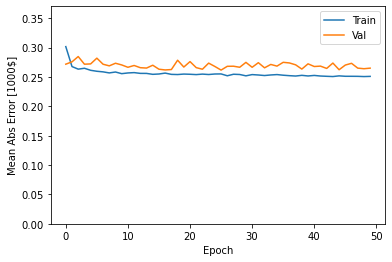

In [21]:
plot_history(history1) # (M_1x)

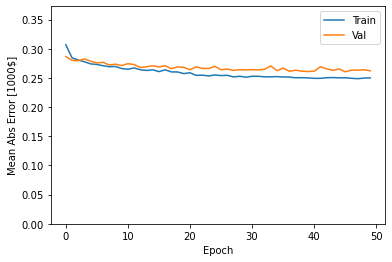

In [22]:
plot_history(history2) #(M1_y)

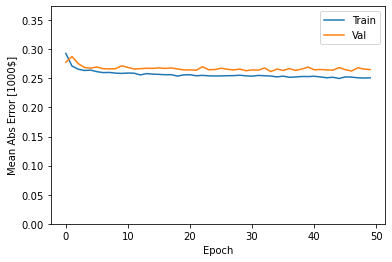

In [23]:
plot_history(history3) #(M2_x)

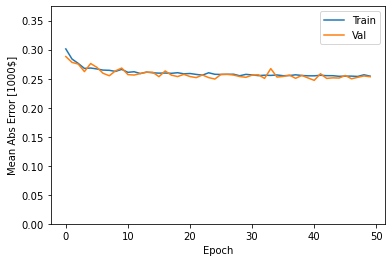

In [24]:
plot_history(history4) #(M2_y)

#### PLOTS

In [25]:
test_predictions1=model_conv1D_tar1.predict(test_data_reshaped)
test_predictions2=model_conv1D_tar2.predict(test_data_reshaped)
test_predictions3=model_conv1D_tar3.predict(test_data_reshaped)
test_predictions4=model_conv1D_tar4.predict(test_data_reshaped)

47/47 [==============================] - 0s 3ms/step


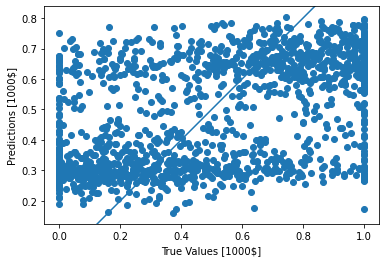

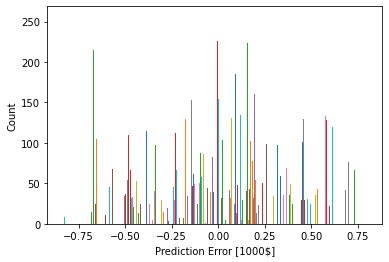

In [26]:
# M1_x
plot_prediction(test_target1,test_predictions1)

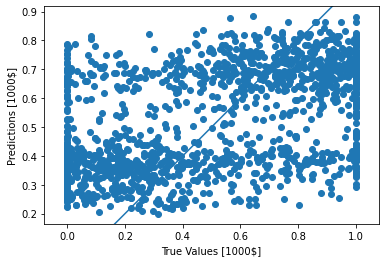

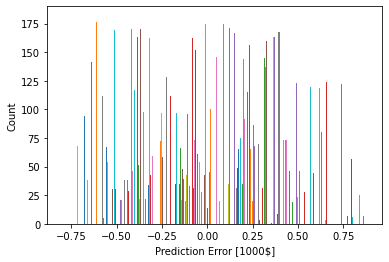

In [27]:
# M1_y
plot_prediction(test_target2,test_predictions2)

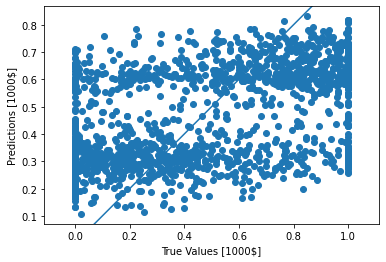

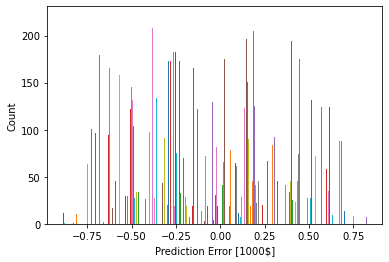

In [28]:
plot_prediction(test_target3,test_predictions3)

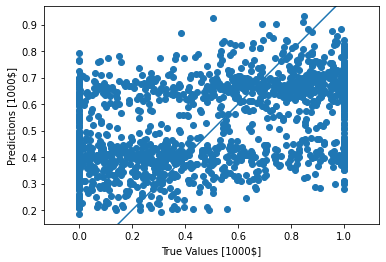

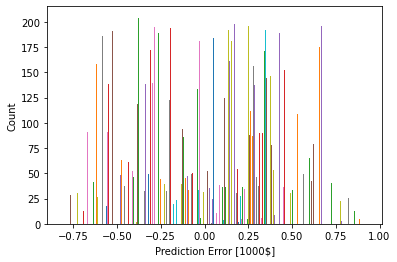

In [29]:
plot_prediction(test_target4,test_predictions4)

47/47 [==============================] - 0s 3ms/step


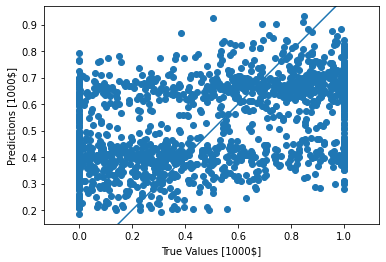

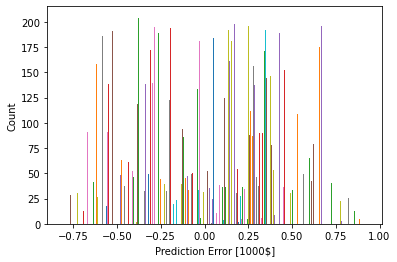

In [32]:
model_conv1D_tardummy = NNM.build_conv1D_model(n_timesteps,n_features,kernel_size)
test_predictionsdummy_4=model_conv1D_tar4.predict(test_data_reshaped)
plot_prediction(test_target4,test_predictionsdummy_4)

In [ ]:
test_predictions1=model_conv1D_tar1.predict(test_data_reshaped)
test_predictions2=model_conv1D_tar2.predict(test_data_reshaped)
test_predictions3=model_conv1D_tar3.predict(test_data_reshaped)


In [31]:
test_data_reshaped.shape

(1499, 6, 1)

In [ ]:
# test
ind= np.random.randint(0,10)
th = .2
Vmove = nt.Gen_MoveC2(goodinp,goodtar,ind,parts=6)
Opos  = goodinp[ind,[4,5]]
nt.HitCheckPlot(Opos[0],Opos[1],th,Vmove)
count = nt.StaticCheckBad(Vmove,Opos,th)
print("count:",count)
print("index:",ind)

In [2]:
def f(x,count=0):
       
    count = count+x
    if(count > 1000):
        return print(count)
    else:
        return f(x)

In [ ]:
f(3)